In [2]:
# helpers
def north(P):
    r = 0
    while r < len(P):
        for c in range(0, len(P[r])):
            if P[r][c] == "O":
                # if we're a rock on the top row, we can't move any more.
                if r == 0:
                    continue
                else:
                    z = r
                    # look up. move until we can't move anymore.
                    while z > 0 and P[z - 1][c] == ".":
                        P[z - 1] = P[z - 1][:c] + "O" + P[z - 1][c + 1 :]
                        P[z] = P[z][:c] + "." + P[z][c + 1 :]
                        z -= 1
            c += 1
        r += 1
    return P


def west(P):
    c = 0
    while c < len(P[0]):
        for r in range(0, len(P)):
            if P[r][c] == "O":
                # if we're a rock on the leftmost column, we can't move any more.
                if c == 0:
                    continue
                else:
                    z = c
                    # look left. move until we can't move anymore.
                    while z > 0 and P[r][z - 1] == ".":
                        P[r] = P[r][: z - 1] + "O" + P[r][z:]
                        P[r] = P[r][:z] + "." + P[r][z + 1 :]
                        z -= 1
            r += 1
        c += 1
    return P


def south(P):
    r = len(P) - 1
    while r >= 0:
        for c in range(0, len(P[r])):
            if P[r][c] == "O":
                # if we're a rock on the bottom row, we can't move any more.
                if r == len(P) - 1:
                    continue
                else:
                    z = r
                    # look down. move until we can't move anymore.
                    while z < len(P) - 1 and P[z + 1][c] == ".":
                        P[z + 1] = P[z + 1][:c] + "O" + P[z + 1][c + 1 :]
                        P[z] = P[z][:c] + "." + P[z][c + 1 :]
                        z += 1
            c += 1
        r -= 1
    return P


def east(P):
    c = len(P[0]) - 1
    while c >= 0:
        for r in range(0, len(P)):
            if P[r][c] == "O":
                # if we're a rock on the rightmost column, we can't move any more.
                if c == len(P[0]) - 1:
                    continue
                else:
                    z = c
                    # look right. move until we can't move anymore.
                    while z < len(P[0]) - 1 and P[r][z + 1] == ".":
                        P[r] = P[r][:z] + "." + P[r][z + 1 :]
                        P[r] = P[r][: z + 1] + "O" + P[r][z + 2 :]
                        z += 1
            r += 1
        c -= 1
    return P


def spin_cycle(P):
    P = north(P)
    P = west(P)
    P = south(P)
    P = east(P)
    return P


def pp(L):
    for l in L:
        print(l)
    print("----------------------------------")



In [3]:
# calculate weight
# load rock = len(rows) - cur_row
def calc_north_load(x): 
    res = 0
    for r in range(0, len(x)):
        for c in range(0, len(x[r])):
            if x[r][c] == "O":
                res += len(x) - r
    return res 


In [4]:
with open("input.txt") as f:
    lines = f.readlines()
    lines = [l.strip() for l in lines]



In [5]:
hist = [] 
for i in range(0, 1000):
    # progress %  
    print("progress: {}%".format((i / 1000) * 100))
    lines = spin_cycle(lines)
    hist.append(lines.copy())


progress: 0.0%
progress: 0.1%
progress: 0.2%
progress: 0.3%
progress: 0.4%
progress: 0.5%
progress: 0.6%
progress: 0.7000000000000001%
progress: 0.8%
progress: 0.8999999999999999%
progress: 1.0%
progress: 1.0999999999999999%
progress: 1.2%
progress: 1.3%
progress: 1.4000000000000001%
progress: 1.5%
progress: 1.6%
progress: 1.7000000000000002%
progress: 1.7999999999999998%
progress: 1.9%
progress: 2.0%
progress: 2.1%
progress: 2.1999999999999997%
progress: 2.3%
progress: 2.4%
progress: 2.5%
progress: 2.6%
progress: 2.7%
progress: 2.8000000000000003%
progress: 2.9000000000000004%
progress: 3.0%
progress: 3.1%
progress: 3.2%
progress: 3.3000000000000003%
progress: 3.4000000000000004%
progress: 3.5000000000000004%
progress: 3.5999999999999996%
progress: 3.6999999999999997%
progress: 3.8%
progress: 3.9%
progress: 4.0%
progress: 4.1000000000000005%
progress: 4.2%
progress: 4.3%
progress: 4.3999999999999995%
progress: 4.5%
progress: 4.6%
progress: 4.7%
progress: 4.8%
progress: 4.9%
progress: 

In [20]:
res_vals = [] 
for i, h in enumerate(hist):
    load = calc_north_load(h)
    res_vals.append(load)

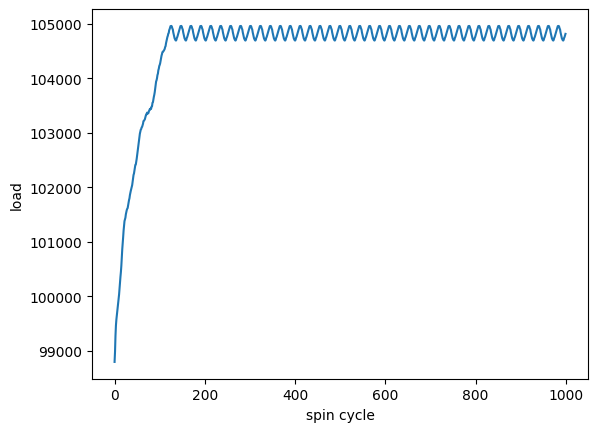

In [21]:
import matplotlib.pyplot as plt
plt.plot(res_vals)
plt.ylabel("load")
plt.xlabel("spin cycle")
plt.show()

In [22]:
res_vals_trunc = res_vals_trunc[150:250]
plt.plot(res_vals_trunc)
plt.ylabel("load")
plt.xlabel("spin cycle")
plt.show()

NameError: name 'res_vals_trunc' is not defined

In [17]:
# what is the period and wavelength of the load function?
for i in range(20, 48):
    print("i: {}, val: {}".format(i, res_vals[i]))

i: 20, val: 104715
i: 21, val: 104698
i: 22, val: 104692
i: 23, val: 104707
i: 24, val: 104742
i: 25, val: 104758
i: 26, val: 104788
i: 27, val: 104815
i: 28, val: 104842
i: 29, val: 104883
i: 30, val: 104903
i: 31, val: 104931
i: 32, val: 104958
i: 33, val: 104958
i: 34, val: 104961
i: 35, val: 104945
i: 36, val: 104913
i: 37, val: 104897
i: 38, val: 104844
i: 39, val: 104805
i: 40, val: 104758
i: 41, val: 104733
i: 42, val: 104715
i: 43, val: 104698
i: 44, val: 104692
i: 45, val: 104707
i: 46, val: 104742
i: 47, val: 104758


In [18]:
# i: 22, val: 104692 
# i: 32, val: 104958
# i: 33, val: 104958
# i: 44, val: 104692


In [38]:
# what is the period and wavelength of the load function?
for i in range(101, 125):
    print("i: {}, val: {}".format(i, res_vals[i]))

i: 101, val: 104275
i: 102, val: 104323
i: 103, val: 104378
i: 104, val: 104414
i: 105, val: 104443
i: 106, val: 104480
i: 107, val: 104483
i: 108, val: 104499
i: 109, val: 104504
i: 110, val: 104520
i: 111, val: 104538
i: 112, val: 104573
i: 113, val: 104590
i: 114, val: 104644
i: 115, val: 104683
i: 116, val: 104725
i: 117, val: 104757
i: 118, val: 104781
i: 119, val: 104819
i: 120, val: 104832
i: 121, val: 104883
i: 122, val: 104903
i: 123, val: 104931
i: 124, val: 104958


In [24]:
# i: 246, val: 104692 
# i: 256, val: 104958
# i: 257, val: 104958
# i: 268, val: 104692


In [44]:
# find a pattern in the start of the load function
for x in range(0, len(res_vals)):
    if res_vals[x] == 104692:
        print("i: {}, val: {}".format(x, res_vals[x]))

i: 136, val: 104692
i: 158, val: 104692
i: 180, val: 104692
i: 202, val: 104692
i: 224, val: 104692
i: 246, val: 104692
i: 268, val: 104692
i: 290, val: 104692
i: 312, val: 104692
i: 334, val: 104692
i: 356, val: 104692
i: 378, val: 104692
i: 400, val: 104692
i: 422, val: 104692
i: 444, val: 104692
i: 466, val: 104692
i: 488, val: 104692
i: 510, val: 104692
i: 532, val: 104692
i: 554, val: 104692
i: 576, val: 104692
i: 598, val: 104692
i: 620, val: 104692
i: 642, val: 104692
i: 664, val: 104692
i: 686, val: 104692
i: 708, val: 104692
i: 730, val: 104692
i: 752, val: 104692
i: 774, val: 104692
i: 796, val: 104692
i: 818, val: 104692
i: 840, val: 104692
i: 862, val: 104692
i: 884, val: 104692
i: 906, val: 104692
i: 928, val: 104692
i: 950, val: 104692
i: 972, val: 104692
i: 994, val: 104692


In [46]:
# every 22 cycles, the load function starts with 104692 and walks through a predictable pattern.
# where in the 22-step pattern will we be, after 1000000000 cycles?

# start at the min and walk  

"""
i: 22, val: 104692
i: 23, val: 104707
i: 24, val: 104742
i: 25, val: 104758
i: 26, val: 104788
i: 27, val: 104815
"""

# PART 2 ANSWER: 104815 ... I think? 

SyntaxError: cannot assign to operator (810204860.py, line 3)

In [52]:
# when does the pattern start?
for i in range(150, 250):
    print("i: {}, val: {}".format(i, res_vals[i]))

i: 150, val: 104913
i: 151, val: 104897
i: 152, val: 104844
i: 153, val: 104805
i: 154, val: 104758
i: 155, val: 104733
i: 156, val: 104715
i: 157, val: 104698
i: 158, val: 104692
i: 159, val: 104707
i: 160, val: 104742
i: 161, val: 104758
i: 162, val: 104788
i: 163, val: 104815
i: 164, val: 104842
i: 165, val: 104883
i: 166, val: 104903
i: 167, val: 104931
i: 168, val: 104958
i: 169, val: 104958
i: 170, val: 104961
i: 171, val: 104945
i: 172, val: 104913
i: 173, val: 104897
i: 174, val: 104844
i: 175, val: 104805
i: 176, val: 104758
i: 177, val: 104733
i: 178, val: 104715
i: 179, val: 104698
i: 180, val: 104692
i: 181, val: 104707
i: 182, val: 104742
i: 183, val: 104758
i: 184, val: 104788
i: 185, val: 104815
i: 186, val: 104842
i: 187, val: 104883
i: 188, val: 104903
i: 189, val: 104931
i: 190, val: 104958
i: 191, val: 104958
i: 192, val: 104961
i: 193, val: 104945
i: 194, val: 104913
i: 195, val: 104897
i: 196, val: 104844
i: 197, val: 104805
i: 198, val: 104758
i: 199, val: 104733
